<a href="https://colab.research.google.com/github/yazfir/Projects2021/blob/master/ProysDatacademy/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [1]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Estudio/Proyectos/PrimerProyDatacademy/studentsperformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

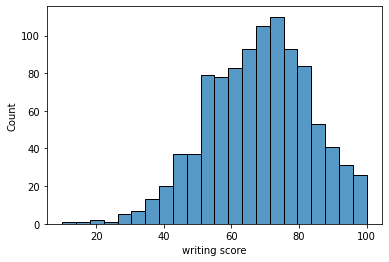

In [9]:
sns.histplot(data=df, x='writing score')

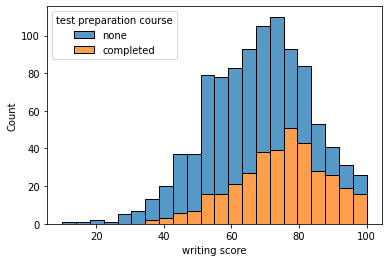

In [10]:
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

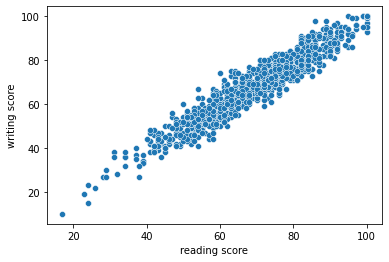

In [11]:
sns.scatterplot(data=df, x='reading score', y='writing score')

### Creando una tabla de frecuencias

In [13]:
freq = df['writing score'].value_counts()
freq

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64

In [15]:
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True) # Ayuda a volver indice o llave a la 1er columna
df_freq = df_freq.rename(columns={'index':'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [16]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [17]:
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [26]:
X = df['reading score'].values
Y = df['writing score'].values

X = X.reshape(-1,1) # Cada valor en X es necesario pasarlo como un tensor de 'N' matrices (valores)

from sklearn.model_selection import train_test_split

# Le decimos que mi datos de prueba van hacer el 20% 
# y los de entrenamiento el 80% restante de nuestros datos reales.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [42]:
# Regresión Lineal

from sklearn.linear_model import  LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train) #Entrenate

print("La pendiente es: ", reg.coef_)
print("El bias es: ", reg.intercept_)
print(reg.score(X_train, Y_train)) #Coeficiente de determinación

La pendiente es:  [0.9958233]
El bias es:  -0.7181623396979688
0.9135143541504174


**Nota.- Cuando nosotros metemos nuestros datos a nuestros modelos siempre tenemos que dividirlo en 2 partes una sección que va hacer de entrenamiento y otra sección que va hacer de test o evaluación. Esto se hace en la mayoría de modelos de machine learning para ver que nuestros datos no esten sesgados.**



```
- Bias .- es la diferencia entre la prediccion esperada de nuestro modelo y los valores verdaderos.


- El coeficiente de determinación mide que porcentaje de la varianza de la variable dependiente es explicado por la varianza de 
la(s) variable(s) independiente(s) en un modelo de regresión. 

Por ejemplo en este caso vemos que el coeficiente es 0.91 o 91%, esto significa que 91% de la varianza del writing score puede ser 
explicada por la varianza del reading score bajo el modelo de regresión aplicado. 

Más información: https://www.investopedia.com/terms/r/r-squared.asp
```



## Visualización de nuestro modelo entrenado

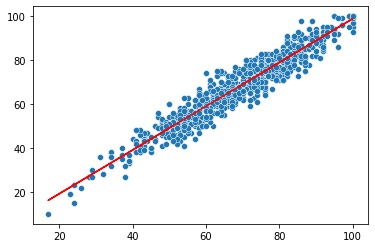

In [44]:
x_flat = X_train.flatten() # regresar los valores a lista


y_hat = reg.predict(X_train) # Predicción

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat,y=Y_train)
plt.plot(X_train, y_hat, color='red')

## Evaluación de nuestro modelo

In [45]:
from sklearn.metrics import  mean_squared_error

Y_pred = reg.predict(X_test)

#Calcular el mean squared error

print(mean_squared_error(Y_test, Y_pred))

20.80848803268196


In [48]:
values = pd.DataFrame({'Actual Test': Y_test.flatten(), 'Predict': Y_pred.flatten()})
values

,Actual Test,Predict
0,79,76.956055
1,65,74.964409
2,67,68.989469
3,70,75.960232
4,90,91.893405
...,...,...
195,64,66.001999
196,72,63.014529
197,82,82.930995
198,74,68.989469
